In [1]:
# base libs
import os.path as path
import numpy as np
import pandas as pd

pd.options.display.max_columns = 500
pd.options.display.max_rows = 100

In [2]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style='white')
cmap = sns.choose_diverging_palette(as_cmap=True)

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

# Common functions

In [3]:
def load_data():
    return pd.read_csv(path.join(path.abspath(''), 'data/train.csv'))

def missing_values_info(df):
    '''
    RProvide information about missing vaules for each column.
    
    Parameters
    ----------
    df: DataFrame 
        Frame
    
    Returns
    ---------
    Missing values info.
    '''
    missing_values_count = df.isnull().sum().sort_values(ascending=False)
    missing_values_percentage = (missing_values_count / len(df))
    unique_values_count = df.nunique()
    unique_values = unique_values_count[unique_values_count < 10].index.to_series().map(lambda col: df[col].unique().tolist())

    missing_values = pd.concat([missing_values_count, missing_values_percentage, unique_values_count, unique_values], \
                               axis=1, \
                               keys=['Total', 'Percentage', 'Unique Count', 'Unique values'], \
                               sort=False)
    
    return missing_values[missing_values['Total'] > 0]

# Load data

In [4]:
df = load_data()

# Data overview

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# drop Id column
df.drop(['Id'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

## - Missing data

In [8]:
df_missing = missing_values_info(df)
df_missing

,Total,Percentage,Unique Count,Unique values
PoolQC,1453,0.995205,3,"[nan, Ex, Fa, Gd]"
MiscFeature,1406,0.963014,4,"[nan, Shed, Gar2, Othr, TenC]"
Alley,1369,0.937671,2,"[nan, Grvl, Pave]"
Fence,1179,0.807534,4,"[nan, MnPrv, GdWo, GdPrv, MnWw]"
FireplaceQu,690,0.472603,5,"[nan, TA, Gd, Fa, Ex, Po]"
LotFrontage,259,0.177397,110,NaN
GarageType,81,0.055479,6,"[Attchd, Detchd, BuiltIn, CarPort, nan, Basmen..."
GarageCond,81,0.055479,5,"[TA, Fa, nan, Gd, Po, Ex]"
GarageFinish,81,0.055479,3,"[RFn, Unf, Fin, nan]"
GarageQual,81,0.055479,5,"[TA, Fa, Gd, nan, Ex, Po]"


Let's drop features with more than 10% missing data as it is rather hard to guess what values should be used and features don't look very promising.

In [9]:
df_missing[df_missing['Percentage'] > 0.1].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

In [10]:
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1, inplace=True)
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

In [11]:
# drop row with missing Electrical value
df.drop(df.loc[df['Electrical'].isnull()].index, inplace=True)

In [12]:
garage_columns = ['GarageCars', 'GarageArea', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']   
df.loc[df[garage_columns].isnull().any(axis=1), garage_columns]

,GarageCars,GarageArea,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,0,0,NaN,NaN,NaN,NaN,NaN
48,0,0,NaN,NaN,NaN,NaN,NaN
78,0,0,NaN,NaN,NaN,NaN,NaN
88,0,0,NaN,NaN,NaN,NaN,NaN
89,0,0,NaN,NaN,NaN,NaN,NaN
99,0,0,NaN,NaN,NaN,NaN,NaN
108,0,0,NaN,NaN,NaN,NaN,NaN
125,0,0,NaN,NaN,NaN,NaN,NaN
127,0,0,NaN,NaN,NaN,NaN,NaN
140,0,0,NaN,NaN,NaN,NaN,NaN


Looks like that all missing vaules are for houses without garage, hence we can fill them

In [13]:
df["GarageType"].fillna("No", inplace=True)
df["GarageFinish"].fillna("No", inplace=True)
df["GarageQual"].fillna("No", inplace=True)
df["GarageCond"].fillna("No", inplace=True)
df.loc[df["GarageYrBlt"].isnull(), ["GarageYrBlt"]] = df.loc[df["GarageYrBlt"].isnull(), "YearBuilt"]

In [14]:
bsmt_columns = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']     
df.loc[df[bsmt_columns].isnull().any(axis=1), bsmt_columns]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,0,0,0,0,NaN,NaN,NaN,NaN,NaN
39,0,0,0,0,NaN,NaN,NaN,NaN,NaN
90,0,0,0,0,NaN,NaN,NaN,NaN,NaN
102,0,0,0,0,NaN,NaN,NaN,NaN,NaN
156,0,0,0,0,NaN,NaN,NaN,NaN,NaN
182,0,0,0,0,NaN,NaN,NaN,NaN,NaN
259,0,0,0,0,NaN,NaN,NaN,NaN,NaN
332,1124,479,1603,3206,Gd,TA,No,GLQ,NaN
342,0,0,0,0,NaN,NaN,NaN,NaN,NaN
362,0,0,0,0,NaN,NaN,NaN,NaN,NaN


In [15]:
df["BsmtCond"].fillna("No", inplace=True)
df["BsmtQual"].fillna("No", inplace=True)
df["BsmtExposure"].fillna("No", inplace=True)
df["BsmtFinType1"].fillna("No", inplace=True)
df["BsmtFinType2"].fillna("No", inplace=True)

In [16]:
df["MasVnrType"].fillna("None", inplace=True)
df["MasVnrArea"].fillna("0", inplace=True)

In [17]:
missing_values_info(df)

,Total,Percentage,Unique Count,Unique values


## - Adjusting column types

In [18]:
# Some numerical features are actually really categories
df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                            50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                            80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                            150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
            "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                        7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}}, inplace=True)

In [19]:
# Encode some categorical features as ordered numbers when there is information in the order
df.replace({"BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
           "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
           "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                             "ALQ" : 5, "GLQ" : 6},
           "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                             "ALQ" : 5, "GLQ" : 6},
           "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
           "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
           "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
           "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                           "Min2" : 6, "Min1" : 7, "Typ" : 8},
           "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
           "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
           "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
           "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
           "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
           "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
           "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
           "Street" : {"Grvl" : 1, "Pave" : 2},
           "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}, inplace=True)

In [20]:
df.dtypes

MSSubClass        object
MSZoning          object
LotArea            int64
Street             int64
LotShape           int64
LandContour       object
Utilities          int64
LotConfig         object
LandSlope          int64
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea        object
ExterQual          int64
ExterCond          int64
Foundation        object
BsmtQual           int64
BsmtCond          object
BsmtExposure       int64
BsmtFinType1       int64
BsmtFinSF1         int64
BsmtFinType2       int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC          int64
CentralAir        object
Electrical        object


# Feature Engineering

## - Common functions

In [21]:
from scipy import stats
from scipy.stats import norm

def feature_distribution(values):
    sns.distplot(values, fit=norm)
    
    fig = plt.figure()
    stats.probplot(values, plot=plt)

In [22]:
df_copy = df.copy()

### SalePrice

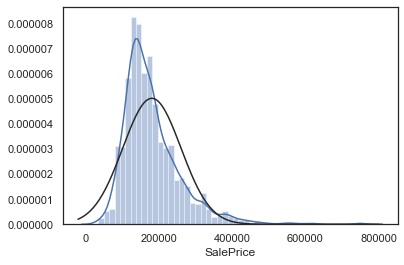

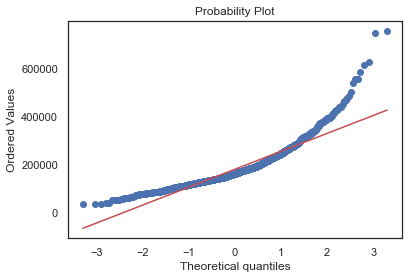

In [23]:
feature_distribution(df_copy["SalePrice"])

'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line. This is one of the awesome things you can learn in statistical books: in case of **positive skewness, log transformations** usually works well.

See 
* https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/
* Hair et al., 2013, Multivariate Data Analysis, 7th Edition
* https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python#3.-Keep-calm-and-work-smart

**Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.**

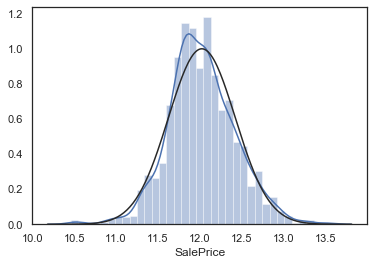

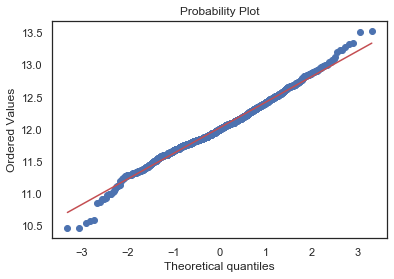

In [24]:
df_copy["SalePrice"] = np.log1p(df_copy["SalePrice"])
feature_distribution(df_copy["SalePrice"])

# Modeling

In [56]:
def encode(df: pd.DataFrame):
    categorical_features = df.select_dtypes(include = ["object"]).columns
    if categorical_features.empty:
        return df
        
    numerical_features = df.select_dtypes(exclude = ["object"]).columns
    
    return pd.concat([df[numerical_features], pd.get_dummies(df[categorical_features])], axis=1)

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

def rmse_cv(model, X, y):
    scores = cross_val_score(estimator=model, X=X, y=y, cv=5, scoring=make_scorer(mean_squared_error, greater_is_better=False))
    print(np.sqrt(-scores))
    return np.mean(np.sqrt(-scores))

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def plot_residual(y_train_pred, y_train_exp, y_test_pred, y_test_exp):
    plt.scatter(y_train_pred, y_train_pred - y_train_exp, c = "blue", marker = "s", label = "Training data")
    plt.scatter(y_test_pred, y_test_pred - y_test_exp, c = "lightgreen", marker = "s", label = "Validation data")
    plt.title("Regression")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.legend(loc = "upper left")
    plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
    plt.show()
    
def plot_predictions(y_train_pred, y_train_exp, y_test_pred, y_test_exp):
    plt.scatter(y_train_pred, y_train_exp, c = "blue", marker = "s", label = "Training data")
    plt.scatter(y_test_pred, y_test_exp, c = "lightgreen", marker = "s", label = "Validation data")
    plt.title("Regression")
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.legend(loc = "upper left")
    plt.plot([y_train_exp.min(), y_train_exp.max()], [y_train_exp.min(), y_train_exp.max()], c = "red")
    plt.show()
    
def plot_coef(coefs: pd.Series):
    print(f"Regression picked {sum(coefs != 0)} features and eliminated the other {sum(coefs == 0)} features")
    if len(coefs) > 20:
        important_coefs = pd.concat([coefs.sort_values().head(10),
                         coefs.sort_values().tail(10)])
    else:
        important_coefs = coefs
    important_coefs.plot(kind = "barh")
    plt.title("Coefficients")
    plt.show()

## 1. Basic FE \ Linear regression 

In [27]:
df_model = df_copy.copy()

df_model_encoded = encode(df_model)

X = df_model_encoded.drop("SalePrice", axis=1)
y = df_model_encoded["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Scale features. Note, that it should be done only after splitting the tataset into train and test 

In [28]:
from sklearn.preprocessing import StandardScaler

numerical_features = df_model.select_dtypes(exclude = ["object"]).columns.tolist()
numerical_features.remove("SalePrice")

scaler = StandardScaler()
# !NOTE: scaler should be trained only on train data
X_train.loc[:, numerical_features] = scaler.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = scaler.transform(X_test.loc[:, numerical_features])

C:\Users\Max\Miniconda3\envs\becoming-data-scientist\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Max\Miniconda3\envs\becoming-data-scientist\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f"RMSE on Training set : {rmse(y_train, lr.predict(X_train))}")
# Used to compare models since allows to estimate generalization properties of the model
print(f"RMSE CV on Training set : {rmse_cv(lr, X_train, y_train)}")

print(f"RMSE on Test set : {rmse(y_test, lr.predict(X_test))}")

RMSE on Training set : 0.07493482156318337
[6.12878458e+08 1.42346406e+09 5.27910449e+08 5.32380757e+08
 1.88972932e+08]
RMSE CV on Training set : 657121331.1588248
RMSE on Test set : 0.1513817551207411


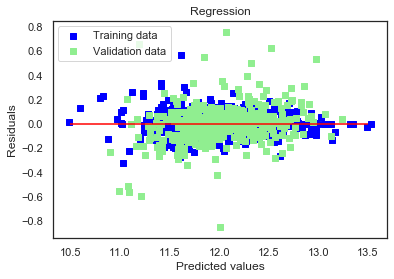

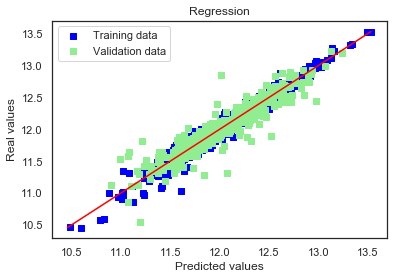

Regression picked 560 features and eliminated the other 11 features


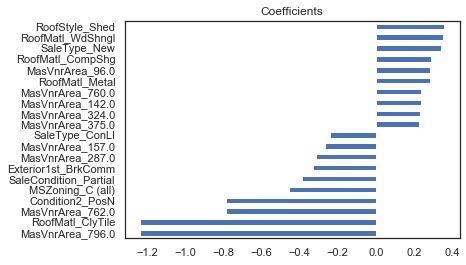

In [30]:
plot_residual(lr.predict(X_train), y_train, lr.predict(X_test), y_test)
plot_predictions(lr.predict(X_train), y_train, lr.predict(X_test), y_test)
plot_coef(pd.Series(lr.coef_, index = X_train.columns))

(!) Cross-validation shows that the model is very sensitive to outliers. Either we have to rid of them or to use regularized models. 

Consider later on how to rid of outliers.

## 2. Ridge regression

In [31]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

ridgeRegession = RidgeCV(alphas=[0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60], cv=10)
ridgeRegession.fit(X_train, y_train)
print(f"alpha={ridgeRegession.alpha_}")
print(f"RMSE on Training set : {rmse(y_train, ridgeRegession.predict(X_train))}")
print(f"RMSE CV on Training set : {rmse_cv(Ridge(alpha=ridgeRegession.alpha_), X_train, y_train)}")

print(f"RMSE on Test set : {rmse(y_test, ridgeRegession.predict(X_test))}")

alpha=6.0
RMSE on Training set : 0.10458048074484005
[0.16045179 0.13050615 0.18241737 0.19544513 0.10909969]
RMSE CV on Training set : 0.15558402668135224
RMSE on Test set : 0.1260003217902855


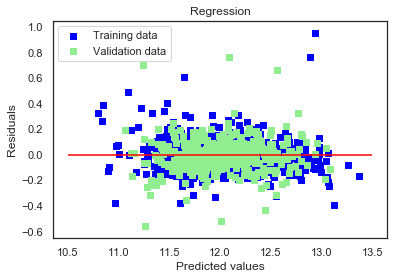

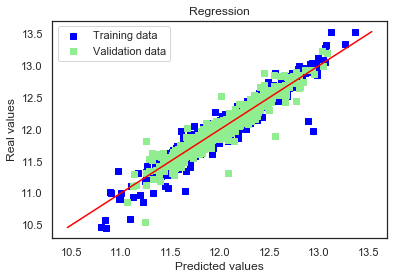

Regression picked 493 features and eliminated the other 78 features


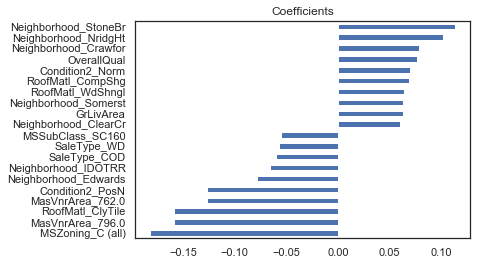

In [32]:
plot_residual(ridgeRegession.predict(X_train), y_train, ridgeRegession.predict(X_test), y_test)
plot_predictions(ridgeRegession.predict(X_train), y_train, ridgeRegession.predict(X_test), y_test)
plot_coef(pd.Series(ridgeRegession.coef_, index = X_train.columns))

Summary: ridge regression is less sensitive to outliers. Continue to work with one of them.

In [60]:
def train_regression_model(df: pd.DataFrame):
    df_model = df.copy()
    df_model_encoded = encode(df_model)

    X = df_model_encoded.drop("SalePrice", axis=1)
    y = df_model_encoded["SalePrice"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    numerical_features = df_model.select_dtypes(exclude = ["object"]).columns.tolist()
    numerical_features.remove("SalePrice")

    scaler = StandardScaler()
    X_train.loc[:, numerical_features] = scaler.fit_transform(X_train.loc[:, numerical_features])
    X_test.loc[:, numerical_features] = scaler.transform(X_test.loc[:, numerical_features])
    
    ridgeRegession = RidgeCV(alphas=[0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60, 90, 120, 200, 250], cv=10)
    ridgeRegession.fit(X_train, y_train)

    print(f"alpha={ridgeRegession.alpha_}")

    print(f"RMSE on Training set : {rmse_cv(Ridge(alpha=ridgeRegession.alpha_), X_train, y_train)}") 
    print(f"RMSE on Test set : {rmse(y_test, ridgeRegession.predict(X_test))}")
    
    plot_residual(ridgeRegession.predict(X_train), y_train, ridgeRegession.predict(X_test), y_test)
    plot_predictions(ridgeRegession.predict(X_train), y_train, ridgeRegession.predict(X_test), y_test)
    plot_coef(pd.Series(ridgeRegession.coef_, index = X_train.columns))

C:\Users\Max\Miniconda3\envs\becoming-data-scientist\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Max\Miniconda3\envs\becoming-data-scientist\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


alpha=6.0
[0.16045179 0.13050615 0.18241737 0.19544513 0.10909969]
RMSE on Training set : 0.15558402668135224
RMSE on Test set : 0.1260003217902855


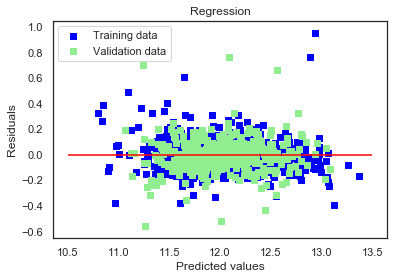

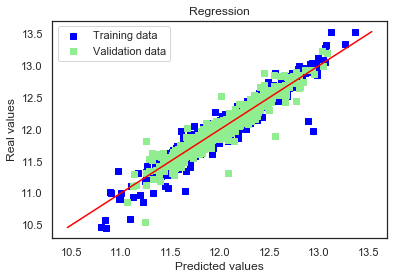

Regression picked 493 features and eliminated the other 78 features


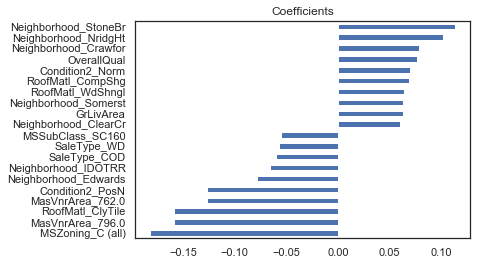

In [61]:
train_regression_model(df_copy)

# Feature engineering 

The result after basic feature engineering using Ridge regression

RMSE on Training set : 0.15558402668135224<br/>
RMSE on Test set : 0.1260003217902855

## 1. Eliminate linearly correlated features

In [114]:
df_model = df_copy.copy()
# in general, it doesn't make sense to calculate correlation for categorical data having more than two values
# hence they should be encoded beforehand
df_model = encode(df_model)
corr_matrix = df_model.corr()
potential_features = corr_matrix[corr_matrix["SalePrice"].abs() > 0.4].sort_values(by=["SalePrice"]).index.tolist()
# shale price should be the last column
potential_features.remove("SalePrice")
potential_features.append("SalePrice")

corr_matrix = corr_matrix.loc[potential_features, potential_features]
potential_features

['GarageFinish_Unf',
 'MSSubClass_SC60',
 'GarageType_Attchd',
 'GarageFinish_Fin',
 'HeatingQC',
 'Fireplaces',
 'Foundation_PConc',
 'TotRmsAbvGrd',
 'YearRemodAdd',
 'GarageYrBlt',
 'YearBuilt',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'BsmtQual',
 'GarageArea',
 'KitchenQual',
 'ExterQual',
 'GarageCars',
 'GrLivArea',
 'OverallQual',
 'SalePrice']

### 1.1 Use highly correlated features  

C:\Users\Max\Miniconda3\envs\becoming-data-scientist\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Max\Miniconda3\envs\becoming-data-scientist\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


alpha=250.0
[0.19272535 0.16428138 0.16385885 0.20175481 0.14678052]
RMSE on Training set : 0.1738801809715309
RMSE on Test set : 0.14680258794446144


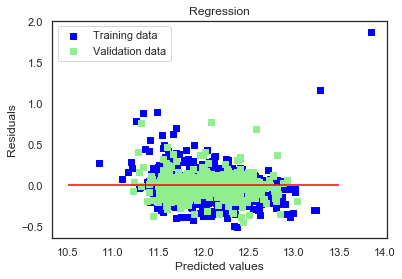

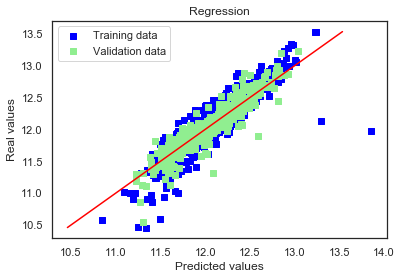

Regression picked 21 features and eliminated the other 0 features


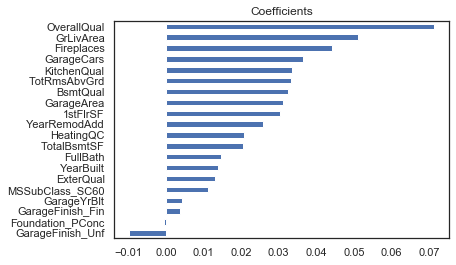

In [64]:
train_regression_model(df_model[potential_features])

(22, 0)

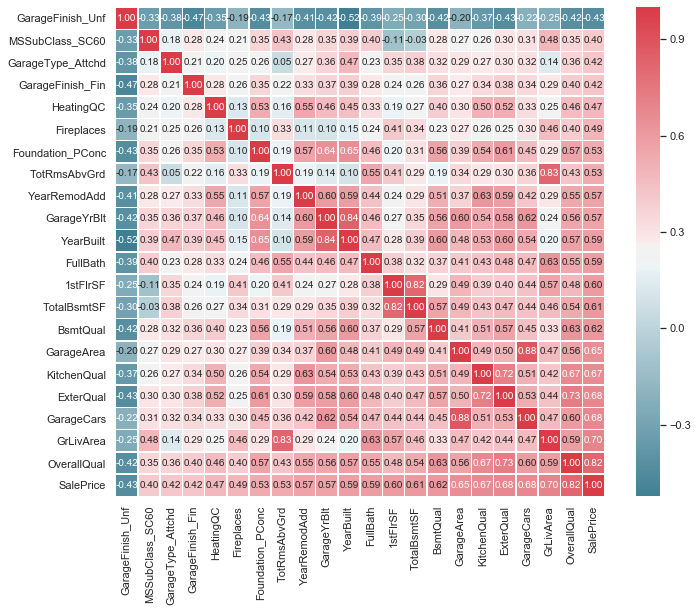

In [65]:
plt.subplots(figsize=(11, 9))
hm = sns.heatmap(
    corr_matrix, 
    cbar=True, 
    annot=True, 
    square=True, 
    fmt='.2f', 
    annot_kws={'size': 10},
    linewidth=0.5, 
    cmap=cmap)
hm.set_ylim(len(potential_features), 0)

### 1.2 Remove features with high pair correlation

In [115]:
cols_to_remove = set()
for i, col in enumerate(reversed(potential_features[:-1])):
    col_corr = corr_matrix.iloc[0:len(potential_features)-i-2][col]
    to_remove = col_corr[col_corr.abs() > 0.6].index.tolist()
    if to_remove:
        print(f"{col}: {to_remove}")
        cols_to_remove.update(to_remove)
cols_to_remove

OverallQual: ['BsmtQual', 'KitchenQual', 'ExterQual', 'GarageCars']
GrLivArea: ['TotRmsAbvGrd', 'FullBath']
GarageCars: ['GarageYrBlt', 'GarageArea']
ExterQual: ['Foundation_PConc', 'KitchenQual']
KitchenQual: ['YearRemodAdd']
GarageArea: ['GarageYrBlt']
BsmtQual: ['YearBuilt']
TotalBsmtSF: ['1stFlrSF']
YearBuilt: ['Foundation_PConc', 'GarageYrBlt']
GarageYrBlt: ['Foundation_PConc', 'YearRemodAdd']


{'1stFlrSF',
 'BsmtQual',
 'ExterQual',
 'Foundation_PConc',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'KitchenQual',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd'}

In [116]:
potential_features = [e for e in potential_features if e not in cols_to_remove]
potential_features

['GarageFinish_Unf',
 'MSSubClass_SC60',
 'GarageType_Attchd',
 'GarageFinish_Fin',
 'HeatingQC',
 'Fireplaces',
 'TotalBsmtSF',
 'GrLivArea',
 'OverallQual',
 'SalePrice']

C:\Users\Max\Miniconda3\envs\becoming-data-scientist\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Max\Miniconda3\envs\becoming-data-scientist\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


alpha=120.0
[0.20945026 0.17785087 0.16498008 0.23204539 0.1704871 ]
RMSE on Training set : 0.19096274100365423
RMSE on Test set : 0.16188887289038012


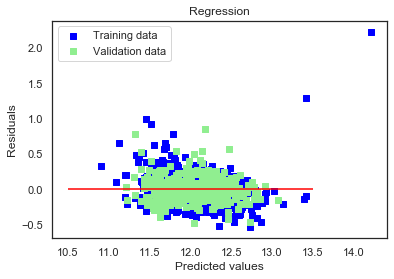

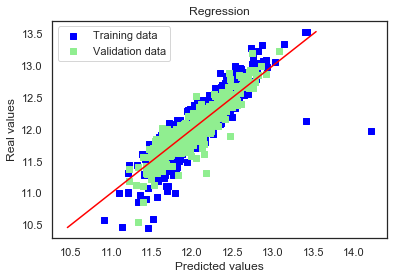

Regression picked 9 features and eliminated the other 0 features


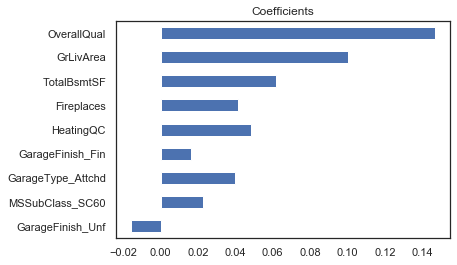

In [120]:
train_regression_model(df_model[potential_features])

## 2. Log transform of skewed numerical features 

In [125]:
df_model = df_copy.copy()

In [126]:
from scipy.stats import skew

def transform_skewed_features(df):
    numerical_features = df.select_dtypes(exclude = ["object"]).columns

    skewness = df[numerical_features].apply(lambda x: skew(x))
    skewness = skewness[abs(skewness) > 0.5]
    print(str(skewness.shape[0]) + " skewed numerical features to log transform")
    skewed_features = skewness.index
    df[skewed_features] = np.log1p(df[skewed_features])

In [127]:
transform_skewed_features(df_model)

40 skewed numerical features to log transform


C:\Users\Max\Miniconda3\envs\becoming-data-scientist\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Max\Miniconda3\envs\becoming-data-scientist\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


alpha=6.0
[0.14712972 0.12503081 0.15620635 0.16389592 0.10425425]
RMSE on Training set : 0.1393034098148931
RMSE on Test set : 0.12064629927722284


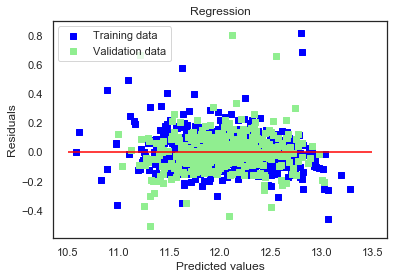

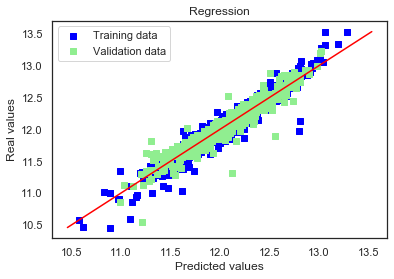

Regression picked 493 features and eliminated the other 78 features


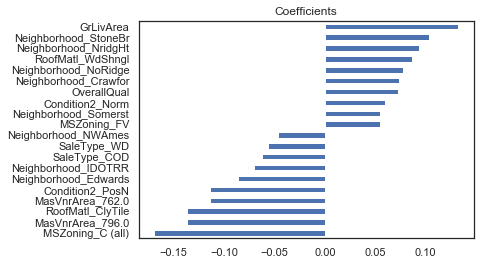

In [128]:
train_regression_model(df_model)

## 3. New features introduction

Based on https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

Then we will create new features, in 3 ways:
* Simplifications of existing features
* Combinations of existing features
* Polynomials on the top 10 existing features